## Association Rule Mining
Main goal is to find out which products are bought frequently together
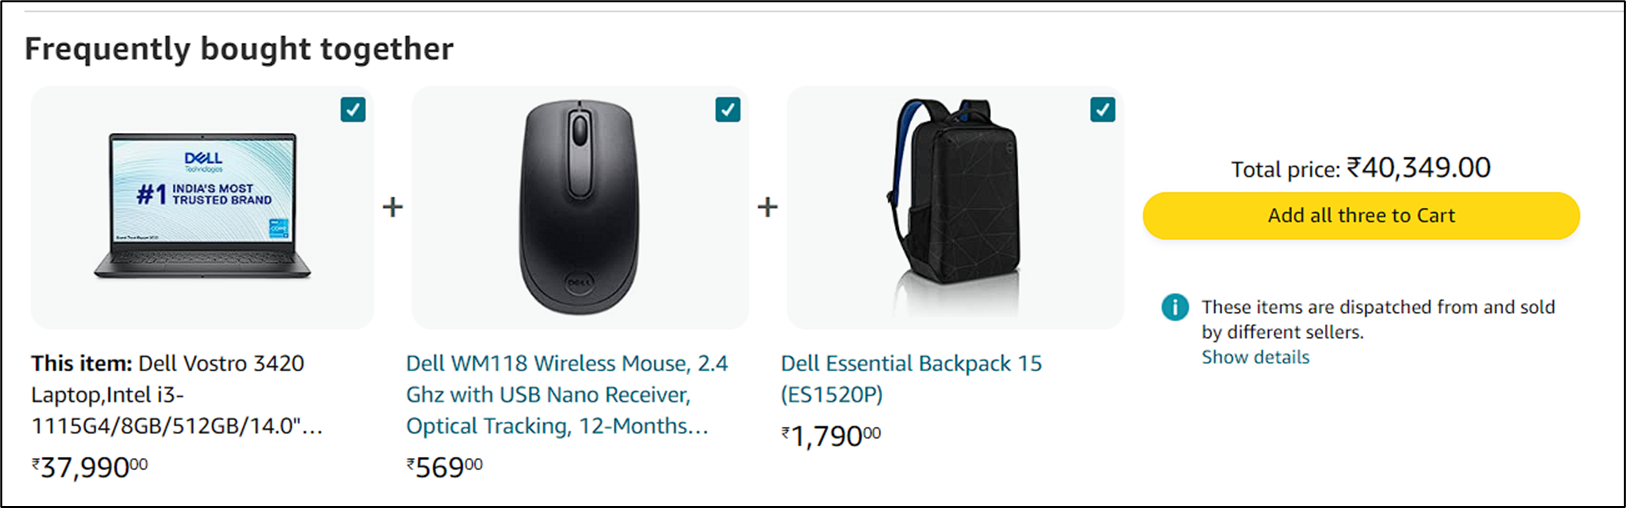

In [1]:
%pip install apyori

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')


In [3]:
from apyori import load_transactions
with open('store_data.csv', 'r') as file1:
    transactions = list(load_transactions(file1, delimiter = ','))

In [4]:

transactions[0:5]

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

In [5]:
len(transactions)

7501

## Step 2 : Calculate Minimum support
Get results only the items whihc are purchased atlease 5 times a day weekly
purchase = 7*5 = 35

In [6]:
sup = (7*5)/len(transactions)
sup

0.004666044527396347

# Minimum Confidence = 0.2, Minimum Lift = 3
# step 3: apply apriori algorithum

In [7]:
from apyori import apriori
association_rules = apriori(
    transactions, 
    min_support = sup, 
    min_confidence = 0.2, 
    min_lift = 3
)
results = list(association_rules)
results

[RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), confidence=0.3234501347708895, lift=3.2919938411349285)]),
 RelationRecord(items=frozenset({'ground beef', 'tomato sauce'}), support=0.005332622317024397, ordered_statistics=[OrderedStatistic(items_base=frozenset({'tomato sauce'}), items_add=frozenset({'groun

In [8]:
results[0][0]

frozenset({'escalope', 'mushroom cream sauce'})

In [9]:
for i in results:
    print(list(i[0]))

['escalope', 'mushroom cream sauce']
['pasta', 'escalope']
['ground beef', 'herb & pepper']
['ground beef', 'tomato sauce']
['olive oil', 'whole wheat pasta']
['pasta', 'shrimp']
['frozen vegetables', 'shrimp', 'chocolate']
['cooking oil', 'ground beef', 'spaghetti']
['frozen vegetables', 'ground beef', 'spaghetti']
['frozen vegetables', 'olive oil', 'milk']
['frozen vegetables', 'mineral water', 'shrimp']
['frozen vegetables', 'olive oil', 'spaghetti']
['frozen vegetables', 'spaghetti', 'shrimp']
['frozen vegetables', 'spaghetti', 'tomatoes']
['grated cheese', 'ground beef', 'spaghetti']
['mineral water', 'ground beef', 'herb & pepper']
['ground beef', 'spaghetti', 'herb & pepper']
['milk', 'olive oil', 'ground beef']
['spaghetti', 'ground beef', 'shrimp']
['milk', 'olive oil', 'spaghetti']
['olive oil', 'mineral water', 'soup']
['olive oil', 'pancakes', 'spaghetti']


In [10]:
type(results[0])

apyori.RelationRecord

## Step4: Save Association results in text file


In [11]:
with open('AssociationResults.txt', 'w') as file2:
    for  i in results:
        file2.writelines(str(i)+'\n\n\n')